In [24]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [25]:
df = pd.read_csv("TSLA.csv")
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')
df['Date'] = pd.to_numeric(df['Date'],errors='coerce')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1277769600000000000,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,1277856000000000000,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,1277942400000000000,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,1278028800000000000,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,1278374400000000000,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2840,1633651200000000000,796.210022,796.380005,780.909973,785.489990,785.489990,16711100
2841,1633910400000000000,787.650024,801.239990,785.500000,791.940002,791.940002,14200300
2842,1633996800000000000,800.929993,812.320007,796.570007,805.719971,805.719971,22020000
2843,1634083200000000000,810.469971,815.409973,805.780029,811.080017,811.080017,14120100


In [26]:
corrMatrix = df.corr()
corrMatrix

,Date,Open,High,Low,Close,Adj Close,Volume
Date,1.000000,0.641076,0.641735,0.640634,0.641184,0.641184,0.466259
Open,0.641076,1.000000,0.999763,0.999691,0.999445,0.999445,0.143866
High,0.641735,0.999763,1.000000,0.999606,0.999771,0.999771,0.149006
Low,0.640634,0.999691,0.999606,1.000000,0.999684,0.999684,0.138580
Close,0.641184,0.999445,0.999771,0.999684,1.000000,1.000000,0.144794
Adj Close,0.641184,0.999445,0.999771,0.999684,1.000000,1.000000,0.144794
Volume,0.466259,0.143866,0.149006,0.138580,0.144794,0.144794,1.000000


In [27]:
#df['Date'] = pd.to_numeric(df['Date'], errors='coerce')

In [28]:
df2 = df

x = df2.values
scaler = preprocessing.MinMaxScaler().fit(x)
#x = scaler.transform(x)
df = pd.DataFrame(x)

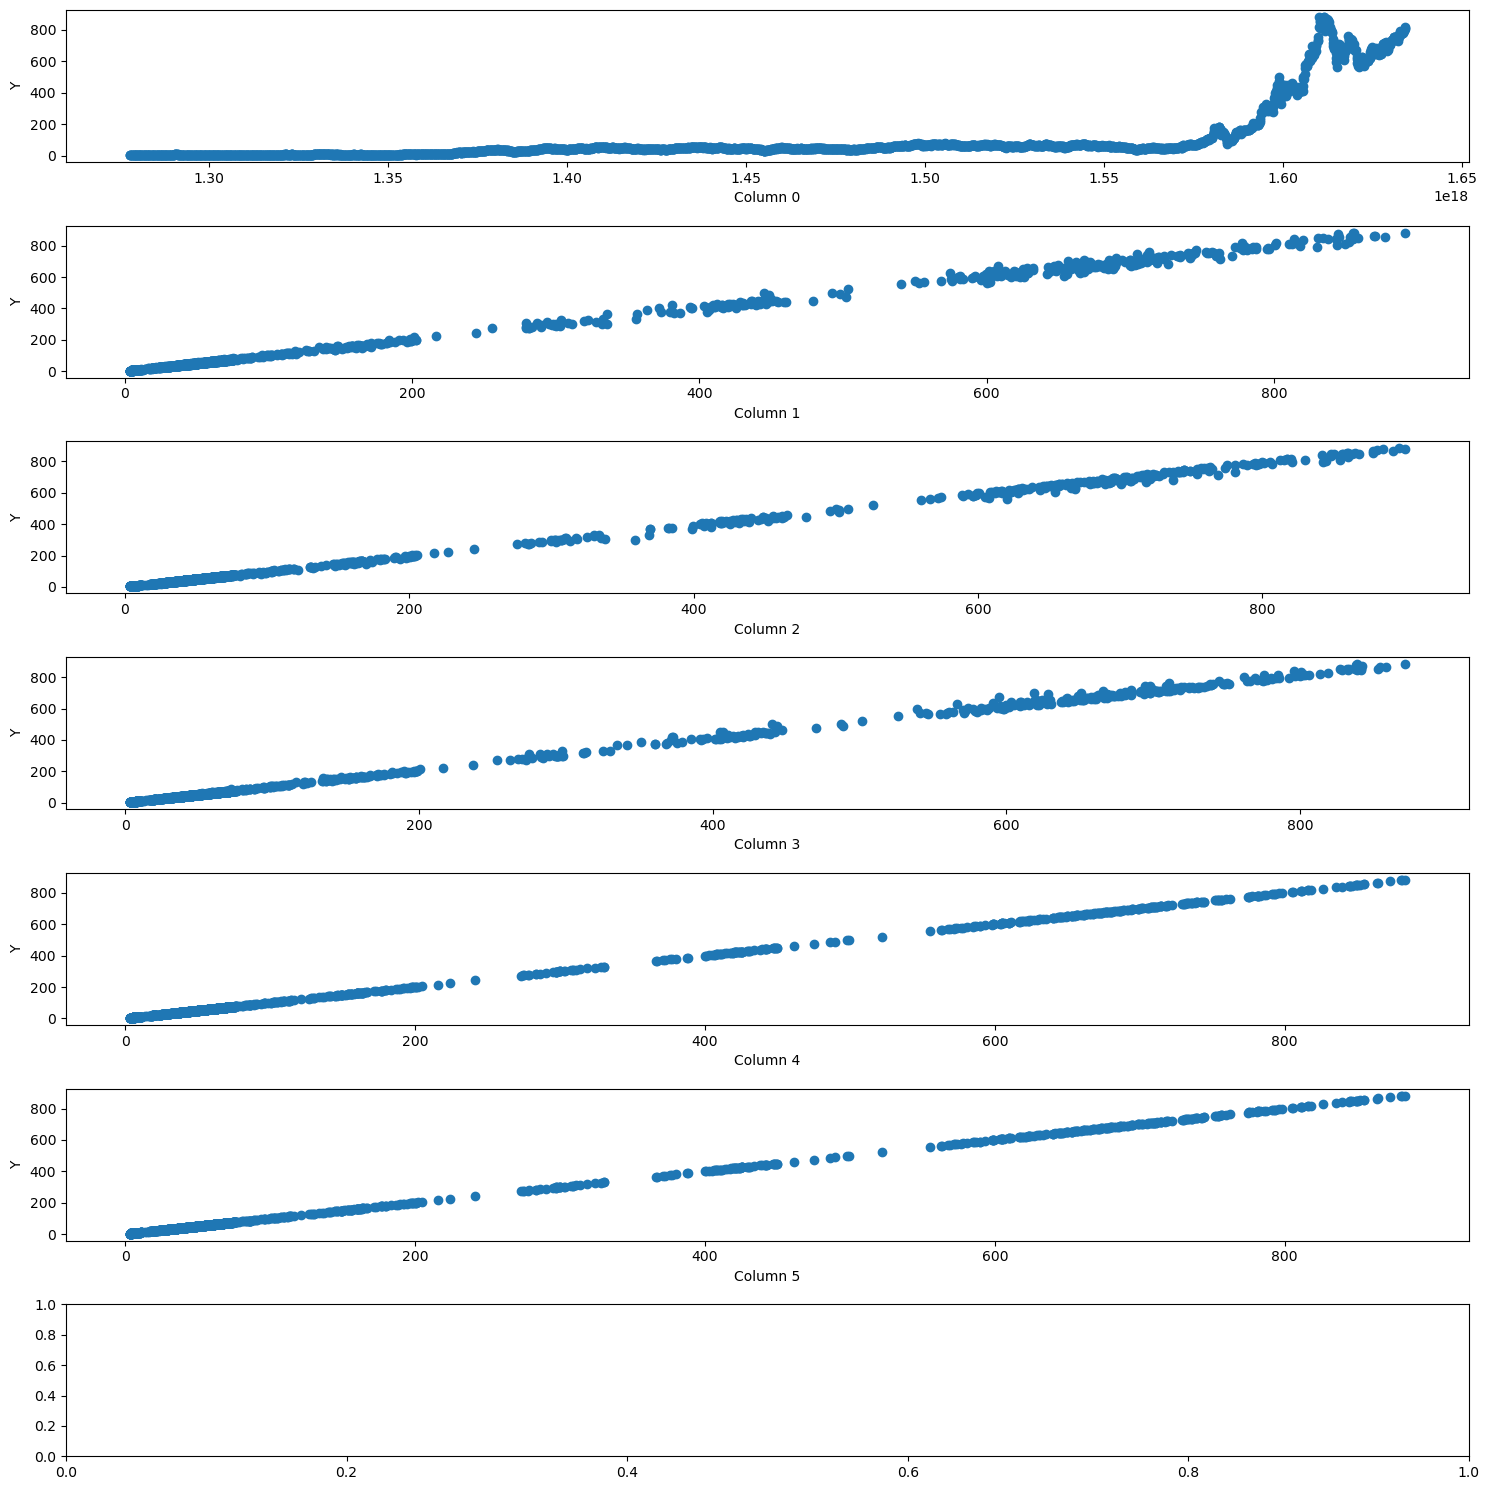

In [29]:
fig, ax = plt.subplots(df.shape[1], figsize=(15, 15))
for i in range(df.shape[1]-1):
    ax[i].scatter(x=df[i], y = df[4])
    ax[i].set_xlabel("Column "+str(i))
    ax[i].set_ylabel("Y")
fig.tight_layout()
plt.show()

In [30]:
X = pd.DataFrame(df[0])
y = pd.DataFrame(df[4])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [31]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)
Y_pred = linear_regressor.predict(X_train)

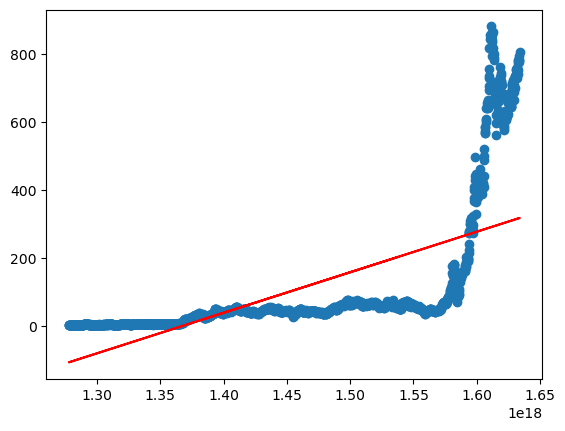

MSE = 21095.046555767265


In [32]:
plt.scatter(X_train,y_train)
plt.plot(X_train,Y_pred, color='red')
plt.show()
print("MSE = "+str(metrics.mean_squared_error(y_train,Y_pred)))

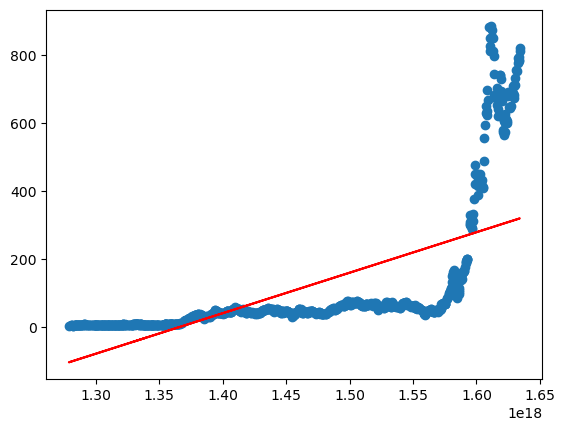

MSE = 20758.462005721703


In [33]:
Y_pred = linear_regressor.predict(X_test)
plt.scatter(X_test,y_test)
plt.plot(X_test,Y_pred, color='red')
plt.show()
print("MSE = "+str(metrics.mean_squared_error(y_test,Y_pred)))

In [39]:

temp = input('Write your date in the following format: YYYY-MM-DD')
date = temp.split(",")
df3 = pd.DataFrame(date)
print(df3)
df3[0] = pd.to_datetime(df3[0], errors='coerce')
df3[0] = pd.to_numeric(df3[0], errors='coerce')

Y_pred = linear_regressor.predict(df3)

print(Y_pred)
print("MSE = "+str(metrics.mean_squared_error(y_test,Y_pred)))


            0
0  2023-05-05
[[376.93212765]]


ValueError: Found input variables with inconsistent numbers of samples: [939, 1]